In [1]:
from functools import cache

import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import reuters
from tensorflow.keras.utils import to_categorical

In [2]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=10000
)

## explore data

In [3]:
len(train_data)

8982

In [4]:
len(test_data)

2246

In [5]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [6]:
max([max(sequence) for sequence in train_data])

9999

In [7]:
@cache
def get_reverse_word_index():
    word_index = reuters.get_word_index()
    reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
    return reverse_word_index


def decode_to_text(encoded):
    reverse_word_index = get_reverse_word_index()
    decoded = " ".join([reverse_word_index.get(i - 3, "?") for i in encoded])
    return decoded

In [8]:
for i in range(5):
    print(f"{i=}")
    print(f"{train_labels[i]=}")
    print(decode_to_text(train_data[i]))
    print("\n")

i=0
train_labels[i]=3
? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


i=1
train_labels[i]=4
? generale de banque sa lt ? br and lt heller overseas corp of chicago have each taken 50 pct stakes in ? company sa ? factors generale de banque said in a statement it gave no financial details of the transaction sa ? ? turnover in 1986 was 17 5 billion belgian francs reuter 3


i=2
train_labels[i]=3
? shr 3 28 dlrs vs 22 cts shr diluted 2 99 dlrs vs 22 cts net 46 0 mln vs 3 328 000 avg shrs 14 0 mln vs 15 2 mln year shr 5 41 dlrs vs 1 56 dlrs shr diluted 4 94 dlrs vs 1 50 dlrs net 78 2 mln vs 25 9 mln avg shrs 14 5 mln vs 15 1 mln note earnings per share r

## prepare data
> Multi-hot encode

In [9]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.0
    return results

In [10]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [11]:
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [12]:
train_labels

array([ 3,  4,  3, ..., 25,  3, 25])

In [13]:
len(set(train_labels))

46

In [14]:
y_train[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

## build model

In [15]:
model = keras.Sequential(
    [
        layers.Dense(64, activation="relu"),
        layers.Dense(64, activation="relu"),
        layers.Dense(46, activation="softmax"),
    ]
)

model.compile(
    optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"]
)

Metal device set to: Apple M1 Max


2023-01-24 22:08:20.485294: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-01-24 22:08:20.485424: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [16]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

In [17]:
history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_val, y_val),
)

Epoch 1/20


2023-01-24 22:08:20.659638: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


 1/16 [>.............................] - ETA: 5s - loss: 3.8199 - accuracy: 0.0176

2023-01-24 22:08:20.860219: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


16/16 [==============================] - 1s 19ms/step - loss: 2.6425 - accuracy: 0.5155 - val_loss: 1.7187 - val_accuracy: 0.6340
Epoch 2/20
13/16 [=======================>......] - ETA: 0s - loss: 1.4423 - accuracy: 0.6961

2023-01-24 22:08:21.242129: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


16/16 [==============================] - 0s 11ms/step - loss: 1.4306 - accuracy: 0.6968 - val_loss: 1.2930 - val_accuracy: 0.7240
Epoch 3/20
16/16 [==============================] - 0s 11ms/step - loss: 1.0740 - accuracy: 0.7674 - val_loss: 1.1259 - val_accuracy: 0.7490
Epoch 4/20
16/16 [==============================] - 0s 12ms/step - loss: 0.8476 - accuracy: 0.8160 - val_loss: 1.0204 - val_accuracy: 0.7850
Epoch 5/20
16/16 [==============================] - 0s 12ms/step - loss: 0.6785 - accuracy: 0.8564 - val_loss: 0.9460 - val_accuracy: 0.7900
Epoch 6/20
16/16 [==============================] - 0s 11ms/step - loss: 0.5468 - accuracy: 0.8877 - val_loss: 0.9164 - val_accuracy: 0.8110
Epoch 7/20
16/16 [==============================] - 0s 12ms/step - loss: 0.4416 - accuracy: 0.9060 - val_loss: 0.8670 - val_accuracy: 0.8180
Epoch 8/20
16/16 [==============================] - 0s 11ms/step - loss: 0.3599 - accuracy: 0.9213 - val_loss: 0.8688 - val_accuracy: 0.8210
Epoch 9/20
16/16 [======

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                640064    
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 46)                2990      
                                                                 
Total params: 647,214
Trainable params: 647,214
Non-trainable params: 0
_________________________________________________________________


In [19]:
def vis_acc(history):
    xs = list(range(1, 1 + len(history.history["accuracy"])))
    plt.plot(xs, history.history["accuracy"], label="training accuracy")
    plt.plot(xs, history.history["val_accuracy"], label="validation accuracy")
    plt.legend(loc="lower right")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.xlim(1, len(xs))
    plt.show()


def vis_loss(history):
    xs = list(range(1, 1 + len(history.history["loss"])))
    plt.plot(xs, history.history["loss"], label="training loss")
    plt.plot(xs, history.history["val_loss"], label="validation loss")
    plt.legend(loc="lower right")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.xlim(1, len(xs))
    plt.show()

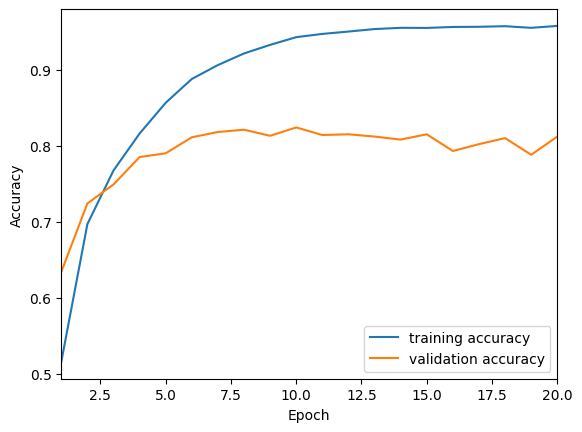

In [20]:
vis_acc(history)

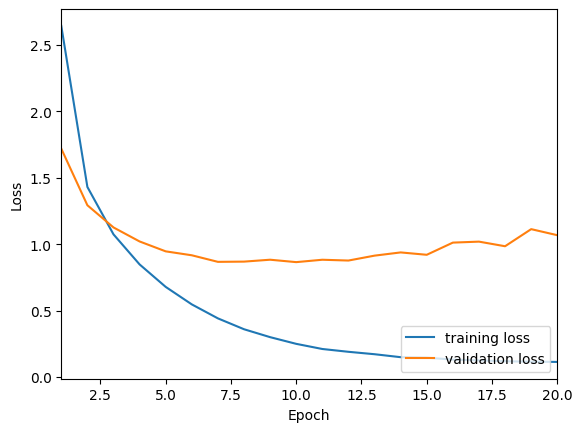

In [21]:
vis_loss(history)